In [1]:
import os
import re
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def get_concurrency_parallelism(cc_value):
    value = int(sqrt(cc_value))
    return value, value

def process_log_files(directory,string):
    dataframes = []
    for filename in os.listdir(directory):
        if filename.startswith(string) and filename.endswith(".log"):
            full_path = os.path.join(directory, filename)
            if os.stat(full_path).st_size == 0:
                print(f"Skipping empty file: {filename}")
                continue
            with open(full_path, 'r') as file:
                data = []
                last_non_zero_throughput = None
                for line in file:
                    match = re.search(r'(\d+\.\d+).*Throughput @(\d+\.\d+)s:\s+(\d+\.\d+)Gbps, lossRate: (\d+\.\d+|\d+) CC:(\d+)\s+score:(-?\d+\.\d+)\s+rtt:(\d+\.\d+) ms energy:(\d+\.\d+) Jules s-plr:(\d+\.\d+)', line)
                    if match:
                        time = datetime.fromtimestamp(float(match.group(1)))
                        throughput = float(match.group(3))
                        if throughput == 0.00 and last_non_zero_throughput is not None:
                            throughput = last_non_zero_throughput
                        elif throughput != 0.00:
                            last_non_zero_throughput = throughput

                        loss_rate = float(match.group(4))
                        cc = int(match.group(5))
                        score = float(match.group(6))
                        rtt = float(match.group(7))
                        energy = float(match.group(8))
                        sender_lr = float(match.group(9))
                        concurrency, parallelism = get_concurrency_parallelism(cc)
                        data.append([time, throughput, loss_rate, cc, score, rtt, energy, sender_lr, concurrency, parallelism])

                if data:
                    df = pd.DataFrame(data, columns=['Time', 'Throughput', 'receiver_lr', 'CC', 'Score', 'RTT', 'Energy', 'sender_lr', 'concurrency', 'parallelism'])
                    dataframes.append(df)
                else:
                    print(f"No valid data in file: {filename}")
    return dataframes


In [ ]:
# Example usage
directory = './logFileDir/'
dfs = process_log_files(directory,"MAX_logFile_")

# Print or process the dataframes as needed
for df in dfs:
    print(df)
    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)


    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('MAX (without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.set_ylabel('Concurrency & Parallelism', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    ax3_twin = ax2.twinx()
    ax3_twin.plot(df['Time'], df['CC'], label='CC', color='brown', linestyle=':')
    ax3_twin.set_ylabel('CC', color='brown')
    ax3_twin.tick_params(axis='y', labelcolor='brown')
    
    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['receiver_lr'], label='Receiver Loss Rate', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['sender_lr'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')
    ax4_twin.set_ylim(-5,25)

    ax3.set_ylim(-5,25)

    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
    plt.savefig('withBT.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

    
average_throughput = df['Throughput'].mean()
print("Average Throughput:", average_throughput)

total_energy = df['Energy'].sum()
print("Total Energy:", total_energy)

total_plr = df['sender_lr'].sum()
print("Total loss rate:", total_plr)

In [ ]:
# Example usage
directory = './logFileDir/'
dfs = process_log_files(directory,"BO_logFile_")

# Print or process the dataframes as needed
for df in dfs:
    print(df)
    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)


    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('BO (without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.set_ylabel('Concurrency & Parallelism', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    ax3_twin = ax2.twinx()
    ax3_twin.plot(df['Time'], df['CC'], label='CC', color='brown', linestyle=':')
    ax3_twin.set_ylabel('CC', color='brown')
    ax3_twin.tick_params(axis='y', labelcolor='brown')
    
    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['receiver_lr'], label='Receiver Loss Rate', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['sender_lr'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')
    ax4_twin.set_ylim(-5,25)


    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
    plt.savefig('withoutBT.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()
    
average_throughput = df['Throughput'].mean()
print("Average Throughput:", average_throughput)

total_energy = df['Energy'].sum()
print("Total Energy:", total_energy)

total_plr = df['sender_lr'].sum()
print("Total loss rate:", total_plr)


In [ ]:
# Example usage
directory = './logFileDir/'
dfs = process_log_files(directory,"GD_logFile_")

# Print or process the dataframes as needed
for df in dfs:
    print(df)
    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)


    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('GD(without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.set_ylabel('Concurrency & Parallelism', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    ax3_twin = ax2.twinx()
    ax3_twin.plot(df['Time'], df['CC'], label='CC', color='brown', linestyle=':')
    ax3_twin.set_ylabel('CC', color='brown')
    ax3_twin.tick_params(axis='y', labelcolor='brown')
    
    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['receiver_lr'], label='Receiver Loss Rate', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['sender_lr'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')
    ax4_twin.set_ylim(-5,25)


    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
#     plt.savefig('GD.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

average_throughput = df['Throughput'].mean()
print("Average Throughput:", average_throughput)
total_energy = df['Energy'].sum()
print("Total Energy:", total_energy)

total_plr = df['sender_lr'].sum()
print("Total loss rate:", total_plr)

In [ ]:
# Example usage
directory = './logFileDir/'
dfs = process_log_files(directory,"RL_logFile_")

# Print or process the dataframes as needed
for df in dfs:
    print(df)
    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)


    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('RL(without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.plot(df['Time'], df['CC'], label='CC', color='black', linestyle=':')
    ax2.set_ylabel('Concurrency & Parallelism & CC', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    ax3_twin = ax2.twinx()
    ax3_twin.plot(df['Time'], df['Score'], label='Score', color='purple', linestyle='-')
    ax3_twin.set_ylabel('Score', color='brown')
    ax3_twin.tick_params(axis='y', labelcolor='brown')
    
    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['receiver_lr'], label='Receiver Loss Rate', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['sender_lr'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')
    ax4_twin.set_ylim(-5,25)


    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
#     plt.savefig('BO.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

average_throughput = df['Throughput'].mean()
print("Average Throughput:", average_throughput)

total_energy = df['Energy'].sum()
print("Total Energy:", total_energy)

total_plr = df['sender_lr'].sum()
print("Total loss rate:", total_plr)

In [ ]:
# Example usage
directory = './logFileDir/'
dfs = process_log_files(directory,"gd_logFile_")
# print(dfs)
# Print or process the dataframes as needed
for df in dfs:
    print(df)
    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)


    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('GD(without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.plot(df['Time'], df['CC'], label='CC', color='black', linestyle=':')
    ax2.set_ylabel('Concurrency & Parallelism & CC', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    ax3_twin = ax2.twinx()
    ax3_twin.plot(df['Time'], df['Score'], label='Score', color='purple', linestyle='-')
    ax3_twin.set_ylabel('Score', color='brown')
    ax3_twin.tick_params(axis='y', labelcolor='brown')
    
    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['receiver_lr'], label='Receiver Loss Rate', color='purple', linestyle='-')
#     ax3.plot(df['Time'], df['Score'], label='Score', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['sender_lr'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')
    ax4_twin.set_ylim(-5,25)
    ax3.set_ylim(-5,25)

    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
    plt.show()

In [ ]:
# Example usage
directory = './logFileDir/'
dfs = process_log_files(directory,"bo_logFile_")

# Print or process the dataframes as needed
for df in dfs:
    print(df)
    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)


    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('BO(without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.plot(df['Time'], df['CC'], label='CC', color='black', linestyle=':')
    ax2.set_ylabel('Concurrency & Parallelism & CC', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    ax3_twin = ax2.twinx()
    ax3_twin.plot(df['Time'], df['Score'], label='Score', color='purple', linestyle='-')
    ax3_twin.set_ylabel('Score', color='brown')
    ax3_twin.tick_params(axis='y', labelcolor='brown')
    
    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['receiver_lr'], label='Receiver Loss Rate', color='purple', linestyle='-')
#     ax3.plot(df['Time'], df['Score'], label='Score', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['sender_lr'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')
    ax4_twin.set_ylim(-5,25)
    ax3.set_ylim(-5,25)

    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
#     plt.savefig('BO.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
# Example usage
directory = './logFileDir/ppo_1000/'
dfs = process_log_files(directory,"ppo_1000_")

# Print or process the dataframes as needed
for df in dfs:
    print(df)
    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)


    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('PPO 1000 (without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.plot(df['Time'], df['CC'], label='CC', color='black', linestyle=':')
    ax2.set_ylabel('Concurrency & Parallelism & CC', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    ax3_twin = ax2.twinx()
    ax3_twin.plot(df['Time'], df['Score'], label='Score', color='purple', linestyle='-')
    ax3_twin.set_ylabel('Score', color='brown')
    ax3_twin.tick_params(axis='y', labelcolor='brown')
    
    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['receiver_lr'], label='Receiver Loss Rate', color='purple', linestyle='-')
#     ax3.plot(df['Time'], df['Score'], label='Score', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['sender_lr'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')
    ax4_twin.set_ylim(-5,25)
    ax3.set_ylim(-5,25)

    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
#     plt.savefig('BO.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()
    
    average_throughput = df['Throughput'].mean()
    print("Average Throughput:", average_throughput)

    total_energy = df['Energy'].sum()
    print("Total Energy:", total_energy)

    total_plr = df['sender_lr'].sum()
    print("Total loss rate:", total_plr)

In [ ]:
# Example usage
directory = './logFileDir/ppo_2000/'
dfs = process_log_files(directory,"ppo_2000_")

# Print or process the dataframes as needed
for df in dfs:
    print(df)
    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)


    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('PPO 2000 (without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.plot(df['Time'], df['CC'], label='CC', color='black', linestyle=':')
    ax2.set_ylabel('Concurrency & Parallelism & CC', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    ax3_twin = ax2.twinx()
    ax3_twin.plot(df['Time'], df['Score'], label='Score', color='purple', linestyle='-')
    ax3_twin.set_ylabel('Score', color='brown')
    ax3_twin.tick_params(axis='y', labelcolor='brown')
    
    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['receiver_lr'], label='Receiver Loss Rate', color='purple', linestyle='-')
#     ax3.plot(df['Time'], df['Score'], label='Score', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['sender_lr'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')
    ax4_twin.set_ylim(-5,25)
    ax3.set_ylim(-5,25)

    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
#     plt.savefig('BO.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()
    
    average_throughput = df['Throughput'].mean()
    print("Average Throughput:", average_throughput)

    total_energy = df['Energy'].sum()
    print("Total Energy:", total_energy)

    total_plr = df['sender_lr'].sum()
    print("Total loss rate:", total_plr)

Reading from files in ./logFileDir/ppo_1000/


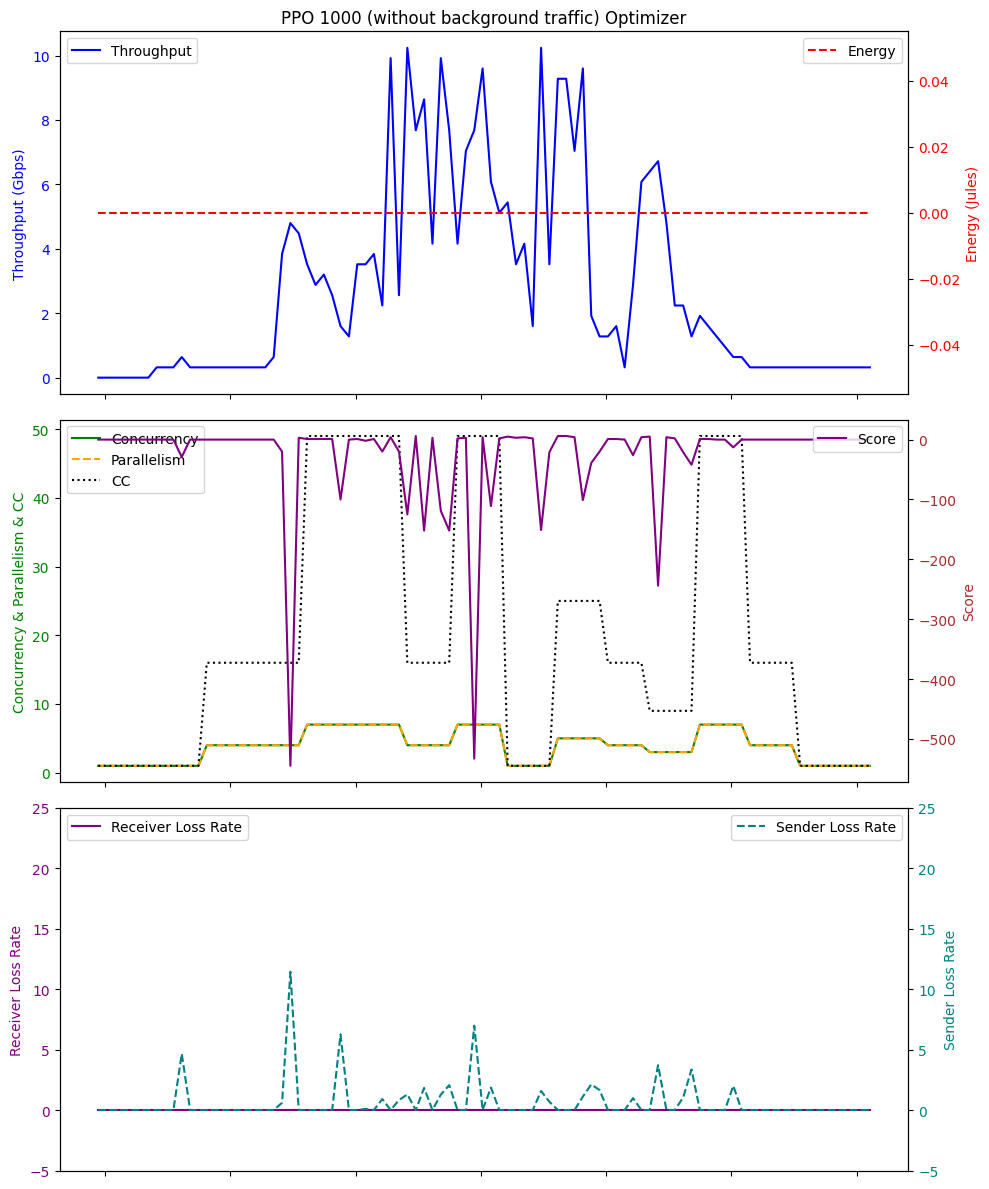

Average Throughput: 2.841739130434782
Total Energy: 0.0
Total loss rate: 58.268891804617965
Reading from files in ./logFileDir/ppo_2000/


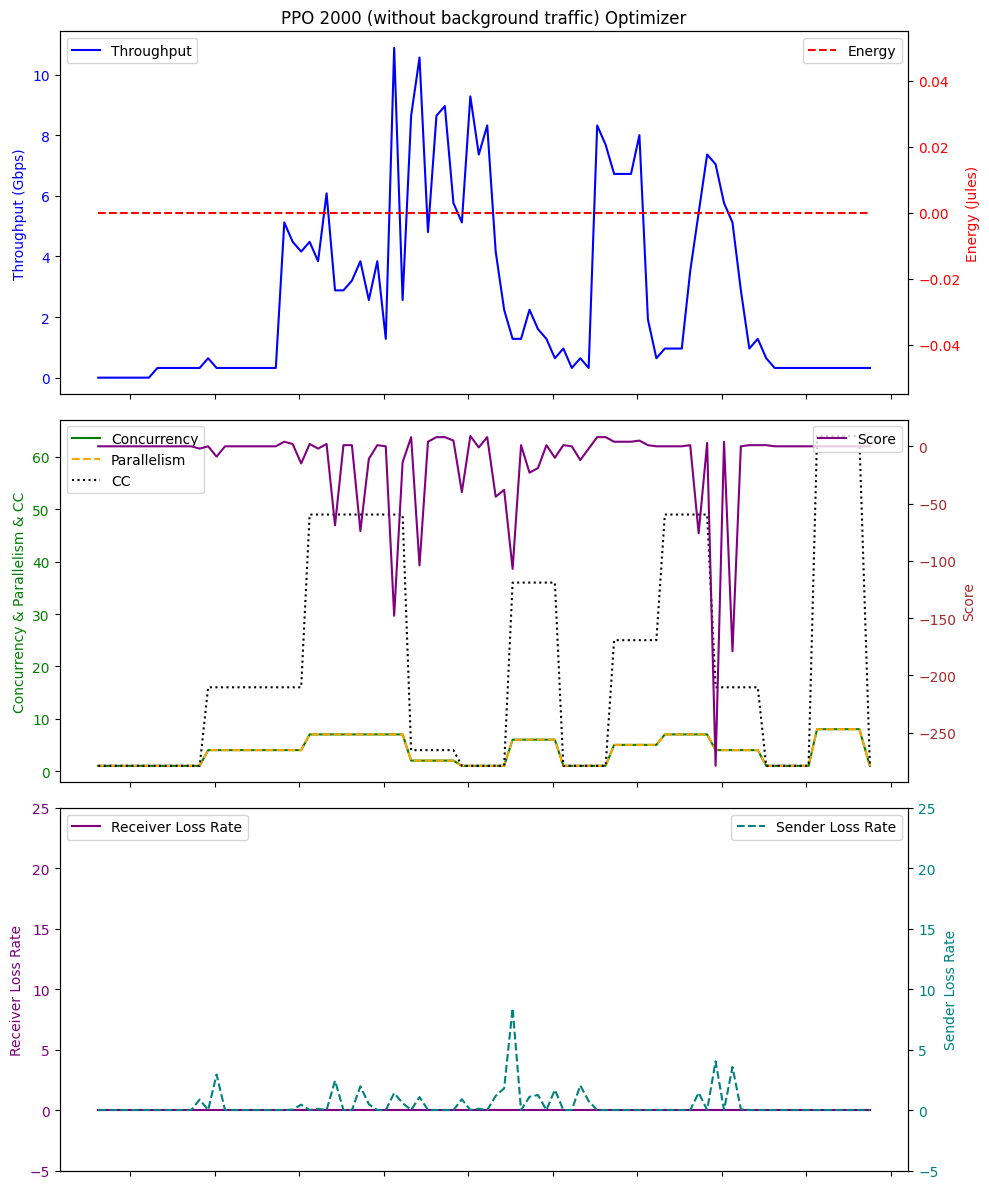

Average Throughput: 2.7721739130434777
Total Energy: 0.0
Total loss rate: 40.53773961426117
Reading from files in ./logFileDir/ppo_3000/


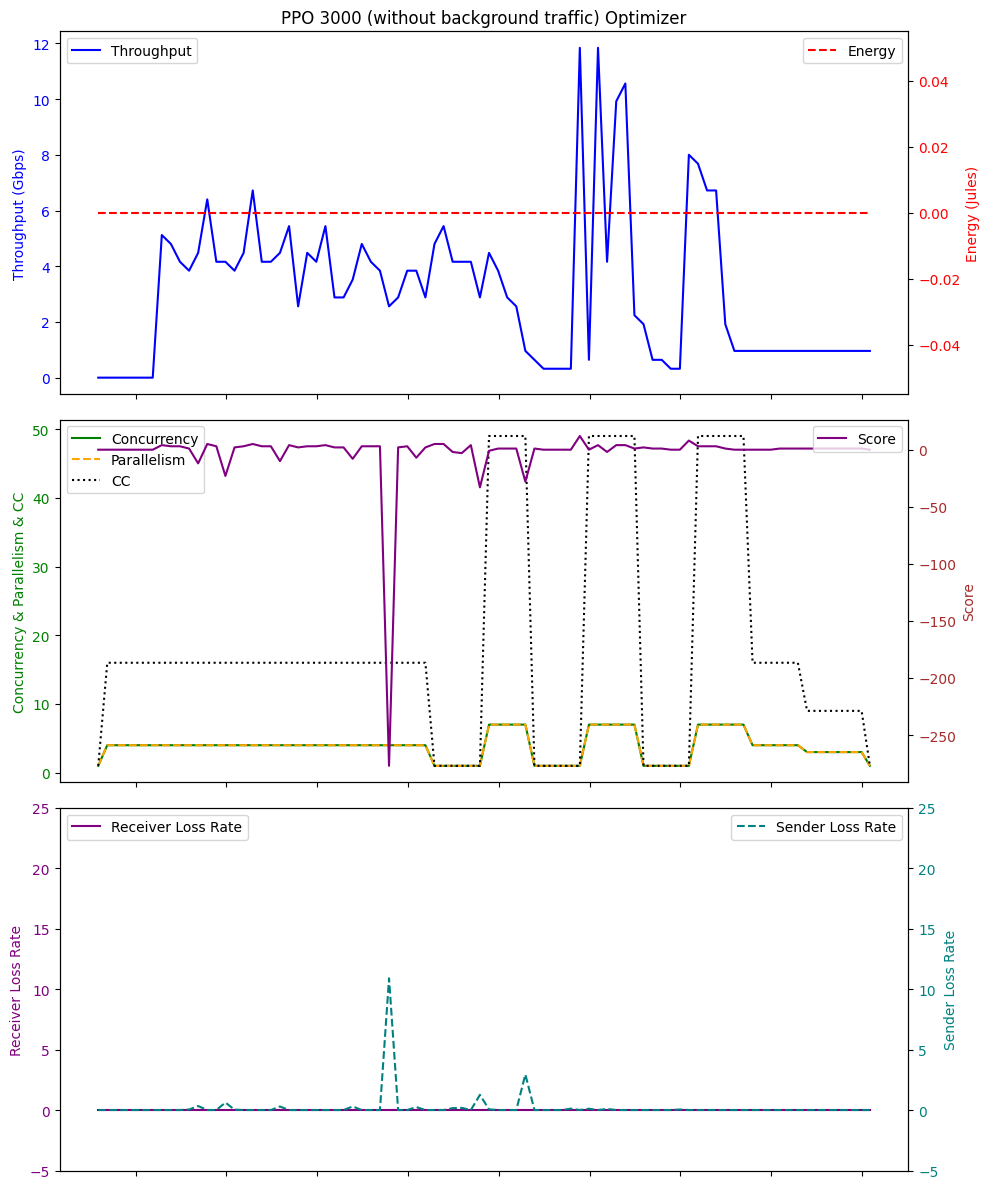

Average Throughput: 3.125581395348836
Total Energy: 0.0
Total loss rate: 17.689314483369415
Reading from files in ./logFileDir/ppo_4000/


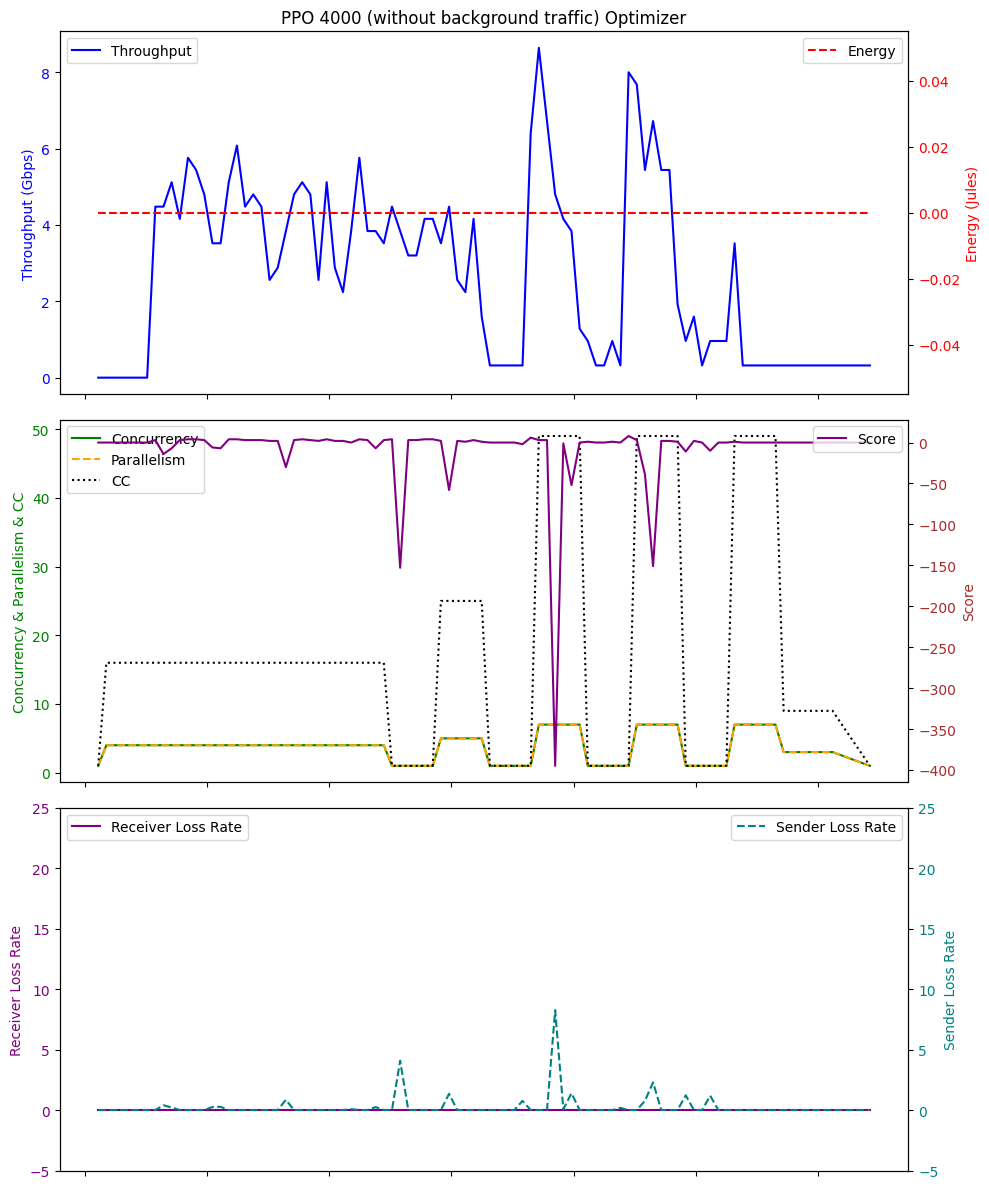

Average Throughput: 2.824347826086957
Total Energy: 0.0
Total loss rate: 23.81220033160126
Reading from files in ./logFileDir/ppo_5000/


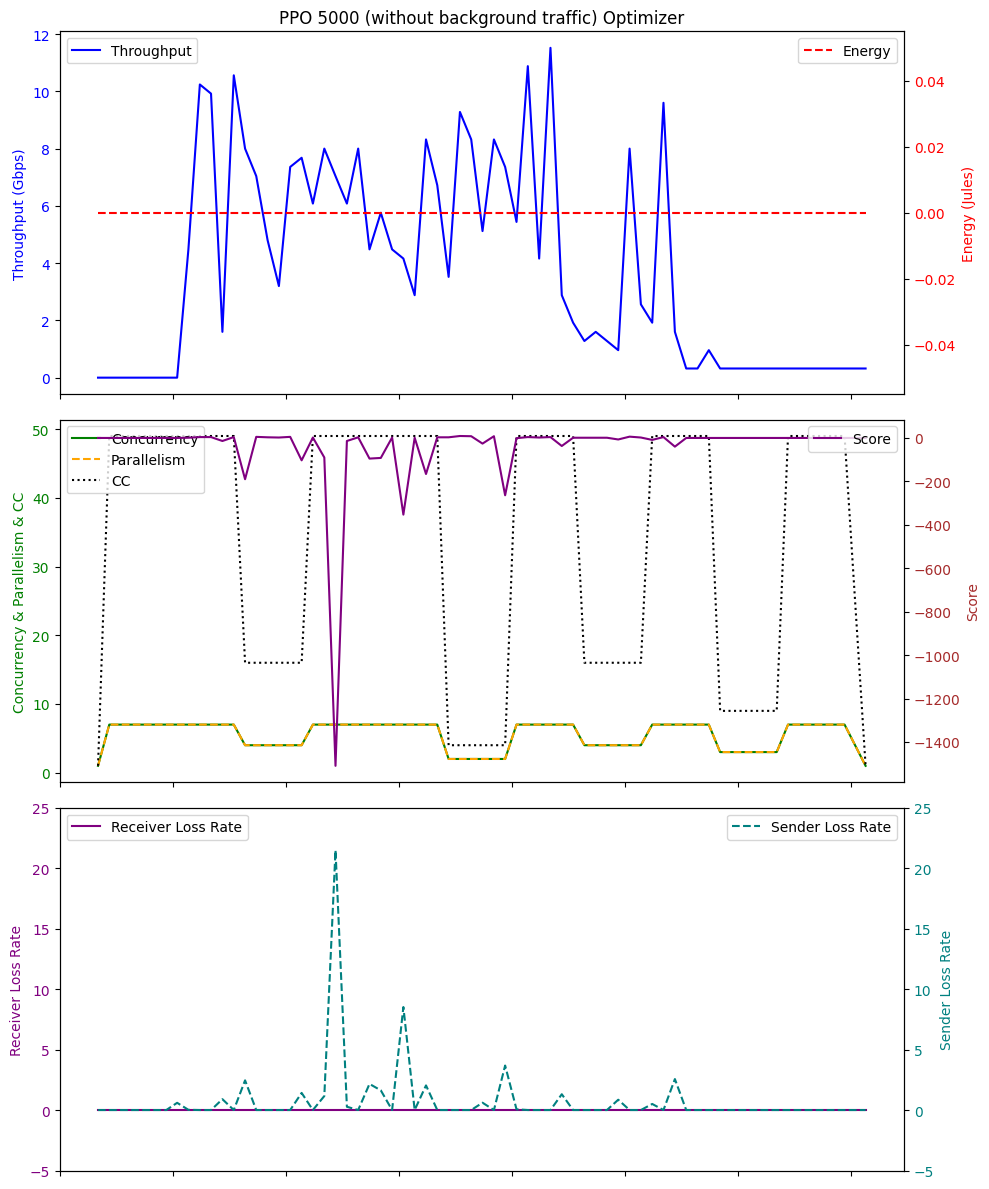

Average Throughput: 3.825882352941176
Total Energy: 0.0
Total loss rate: 52.20280225241238
Reading from files in ./logFileDir/ppo_6000/


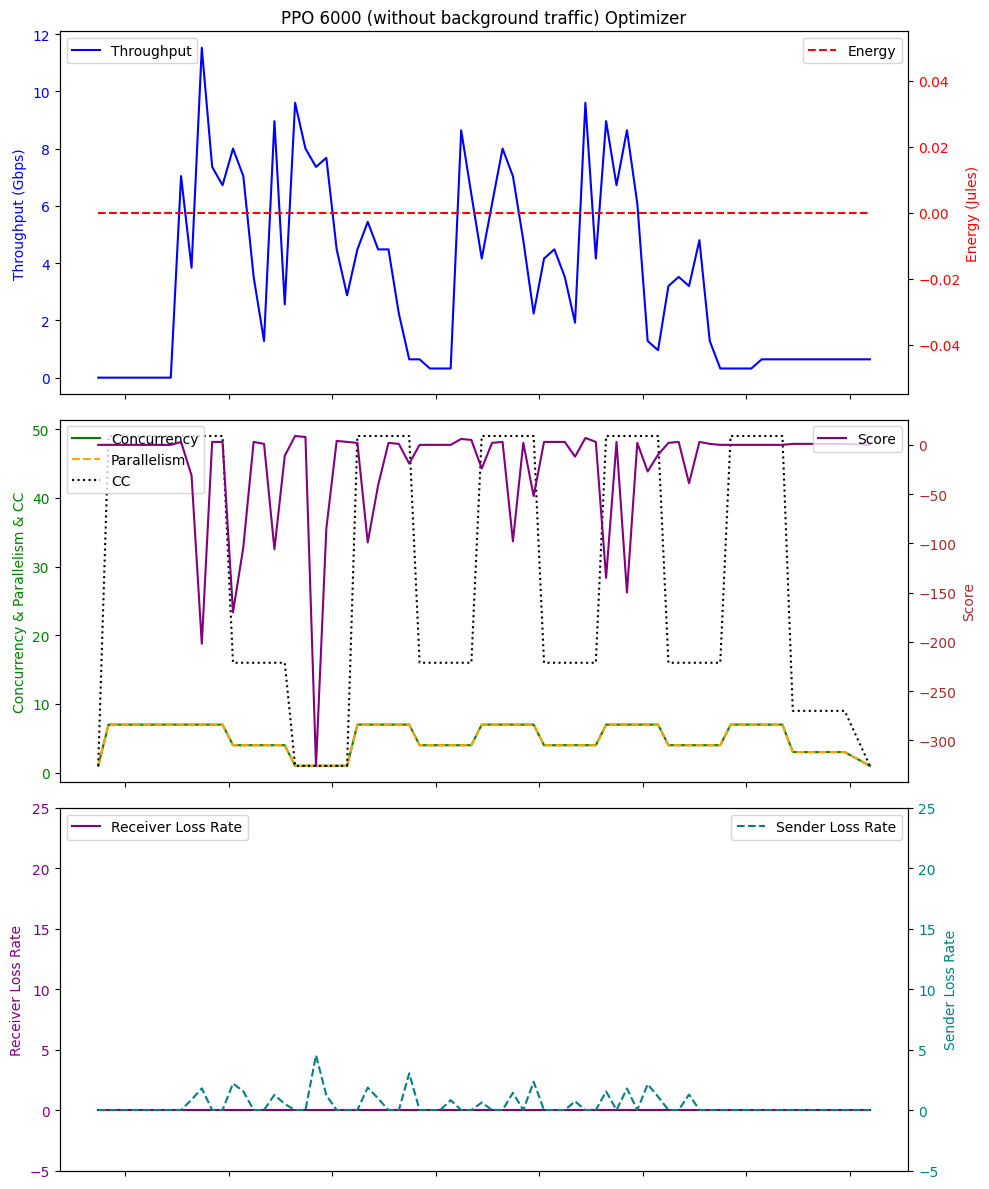

Average Throughput: 3.5502702702702704
Total Energy: 0.0
Total loss rate: 33.4904437344678
Reading from files in ./logFileDir/ppo_7000/


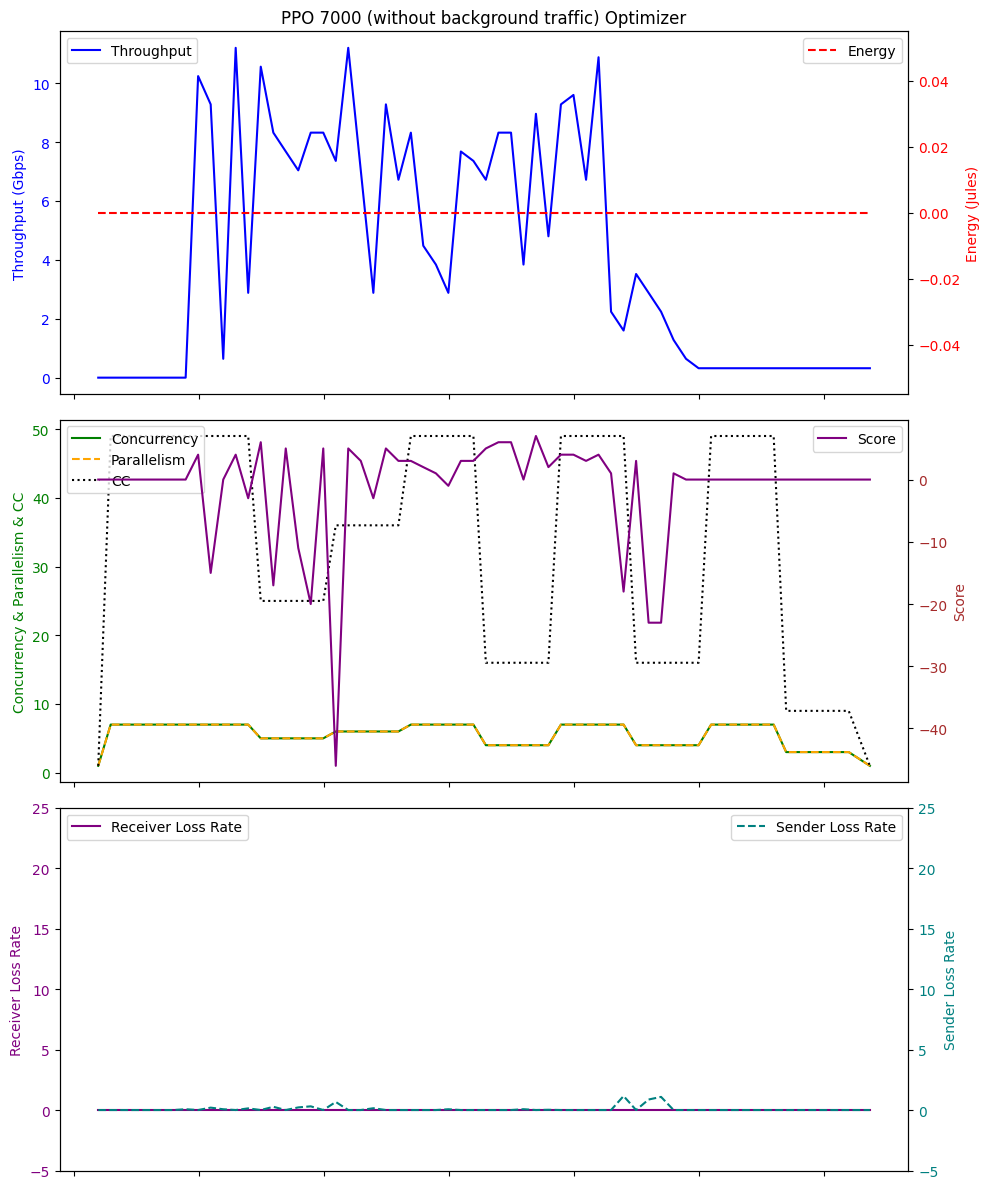

Average Throughput: 4.190967741935483
Total Energy: 0.0
Total loss rate: 5.33826711467919
Reading from files in ./logFileDir/ppo_8000/
Skipping empty file: ppo_8000_logFile_12_27_2023_20_16_43.log


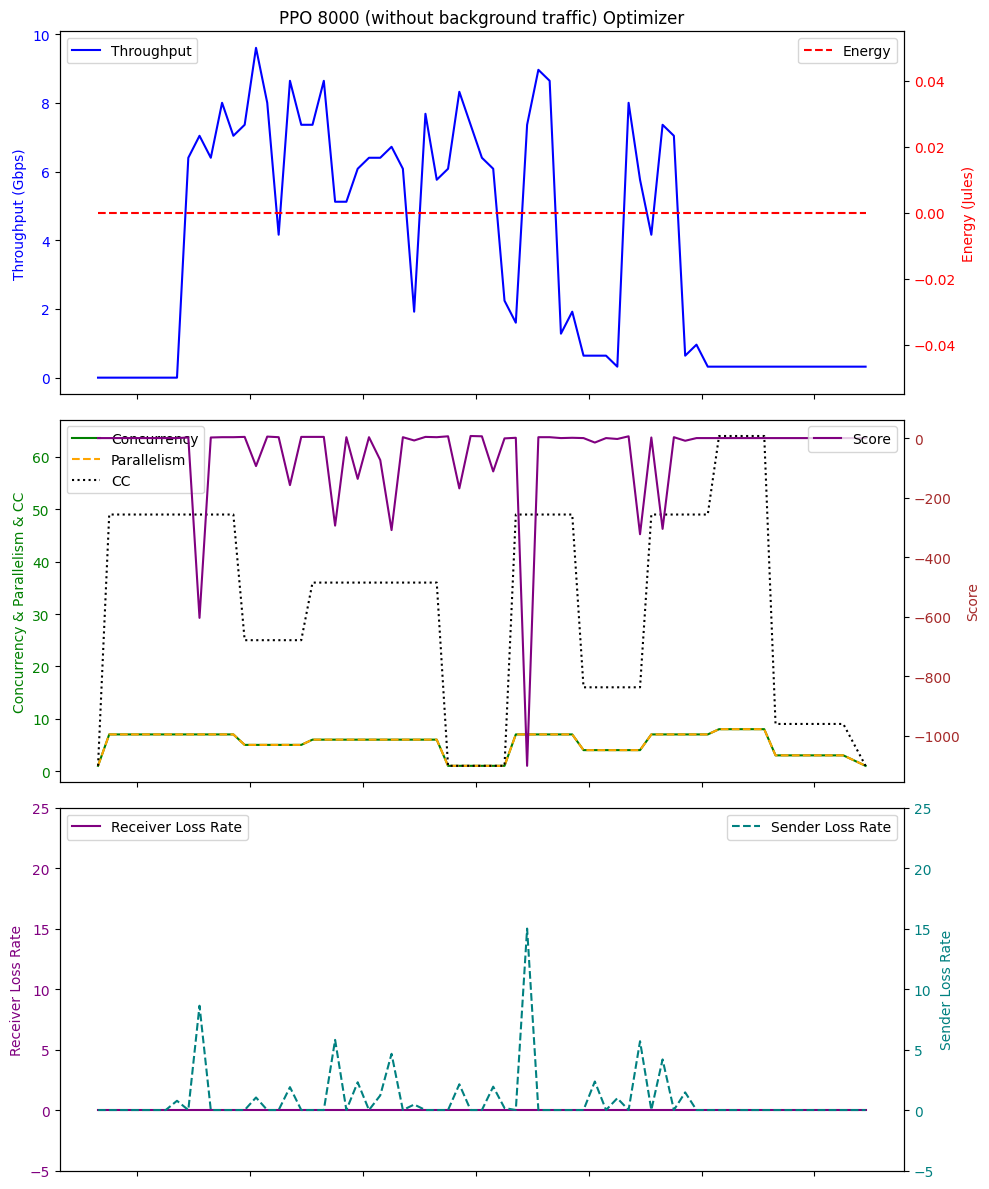

Average Throughput: 3.825882352941176
Total Energy: 0.0
Total loss rate: 60.62179635434211
Reading from files in ./logFileDir/ppo_9000/


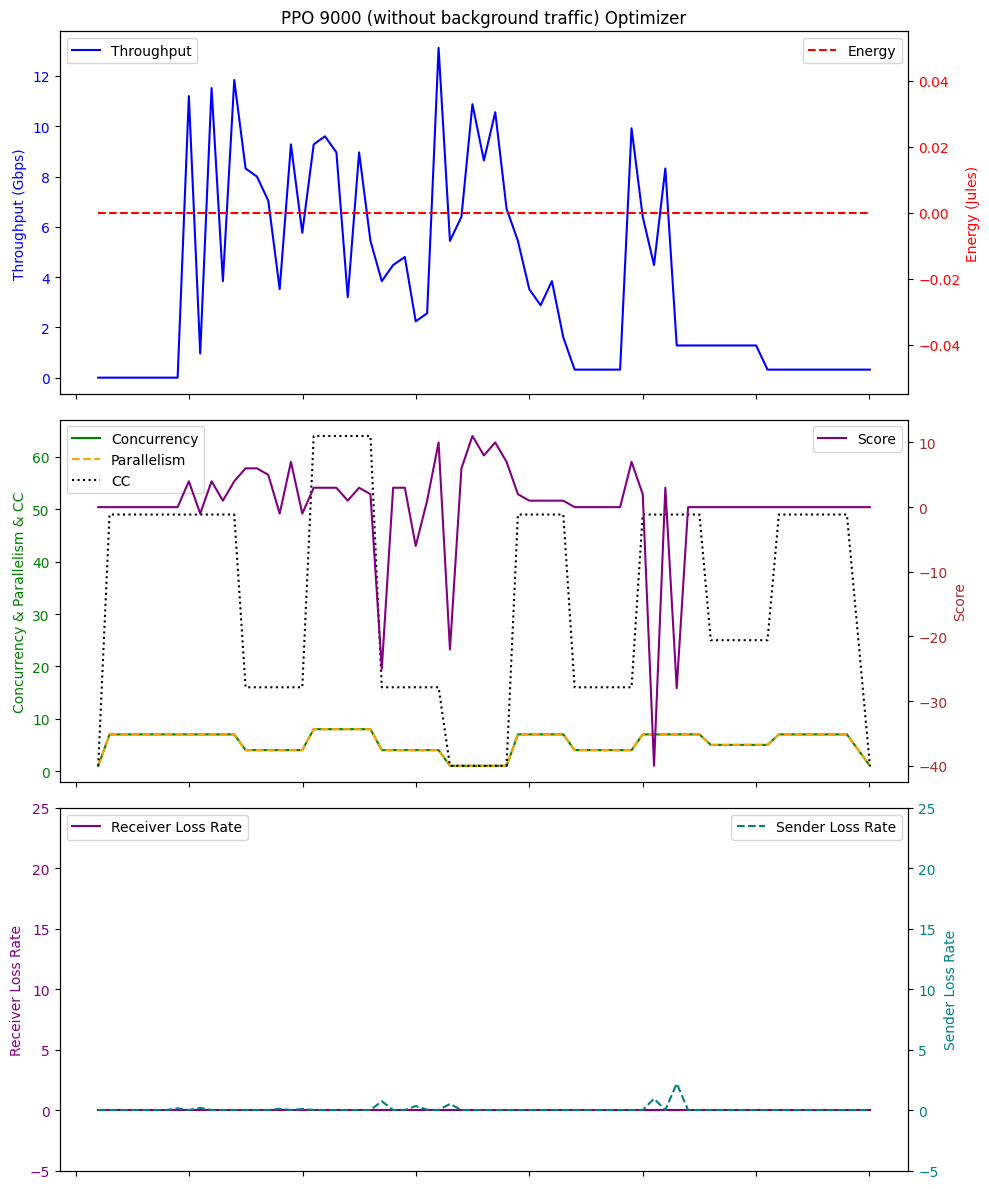

Average Throughput: 3.934117647058823
Total Energy: 0.0
Total loss rate: 5.234636973587278
Reading from files in ./logFileDir/ppo_10000/


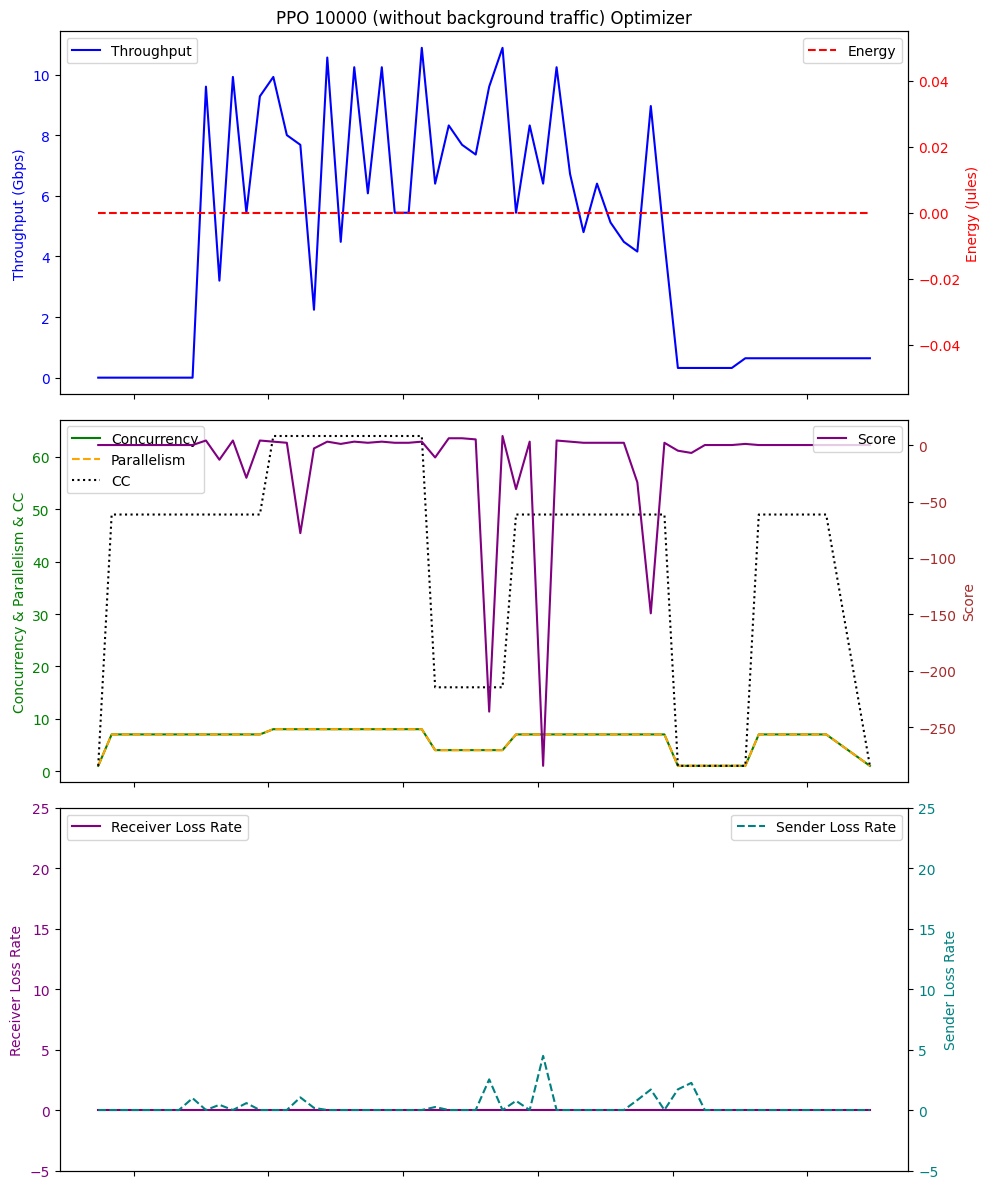

Average Throughput: 4.662857142857143
Total Energy: 0.0
Total loss rate: 17.703401596942097


In [3]:
model_list=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
throughput_list=[]
plr_list=[]
for model in model_list:
    directory = f'./logFileDir/ppo_{model}/'
    print(f'Reading from files in {directory}')
    dfs = process_log_files(directory,f"ppo_{model}_")
    df=dfs[0]
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f'PPO {model} (without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.plot(df['Time'], df['CC'], label='CC', color='black', linestyle=':')
    ax2.set_ylabel('Concurrency & Parallelism & CC', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    ax3_twin = ax2.twinx()
    ax3_twin.plot(df['Time'], df['Score'], label='Score', color='purple', linestyle='-')
    ax3_twin.set_ylabel('Score', color='brown')
    ax3_twin.tick_params(axis='y', labelcolor='brown')
    
    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['receiver_lr'], label='Receiver Loss Rate', color='purple', linestyle='-')
#     ax3.plot(df['Time'], df['Score'], label='Score', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['sender_lr'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')
    ax4_twin.set_ylim(-5,25)
    ax3.set_ylim(-5,25)

    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
    plt.show()
    average_throughput = df['Throughput'].mean()
    print("Average Throughput:", average_throughput)
    throughput_list.append(average_throughput)
    total_energy = df['Energy'].sum()
    print("Total Energy:", total_energy)
    total_plr = df['sender_lr'].sum()
    print("Total loss rate:", total_plr)
    plr_list.append(total_plr)


In [8]:
print("model_list= ", model_list, len(model_list))
print("throughput_list= ",throughput_list, len(throughput_list))
print("plr_list= ",plr_list,len(plr_list))

model_list=  [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000] 10
throughput_list=  [2.841739130434782, 2.7721739130434777, 3.125581395348836, 2.824347826086957, 3.825882352941176, 3.5502702702702704, 4.190967741935483, 3.825882352941176, 3.934117647058823, 4.662857142857143] 10
plr_list=  [58.268891804617965, 40.53773961426117, 17.689314483369415, 23.81220033160126, 52.20280225241238, 33.4904437344678, 5.33826711467919, 60.62179635434211, 5.234636973587278, 17.703401596942097] 10


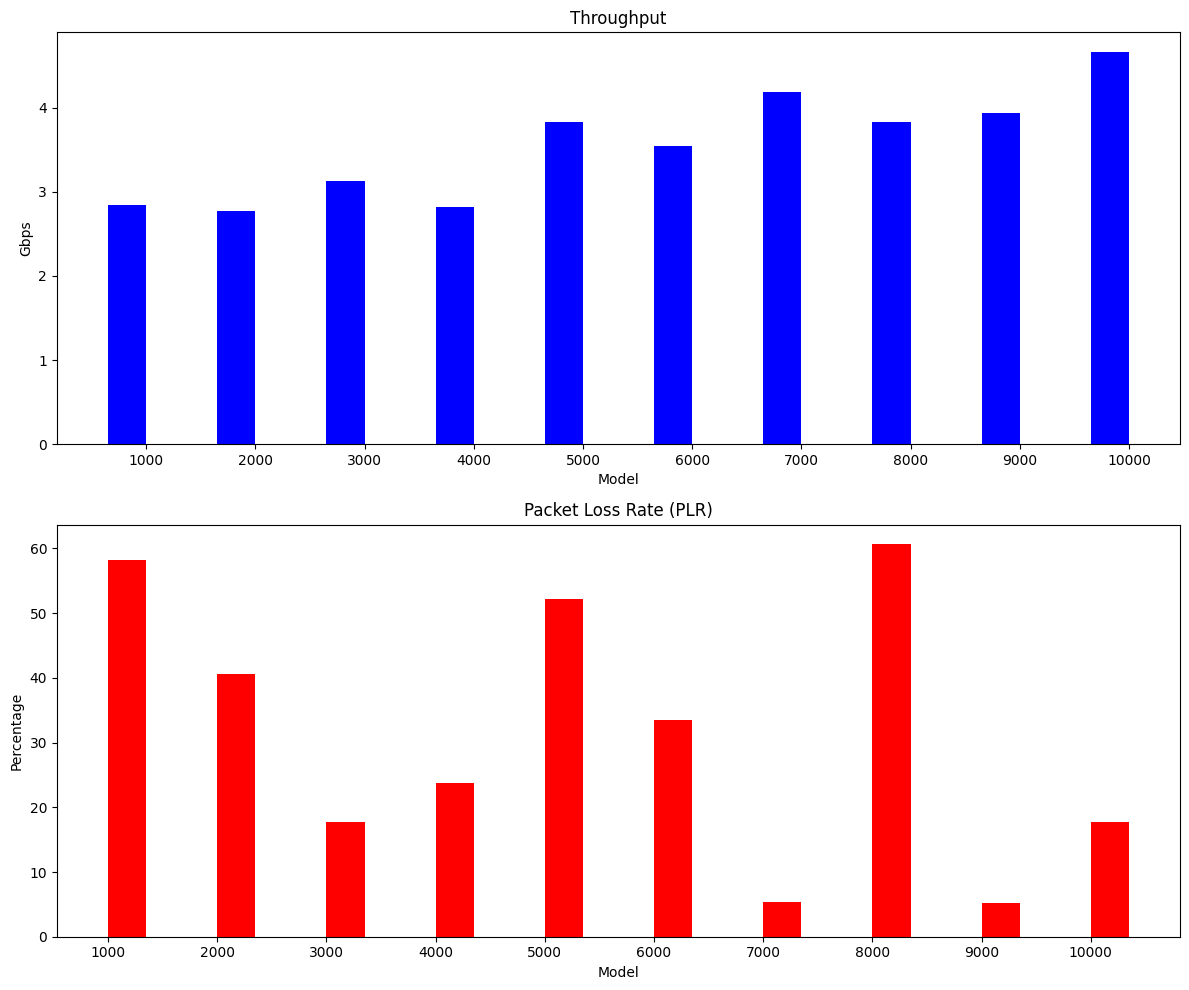

In [16]:
# Bar width
bar_width = 0.35
# X locations for the bars
ind = np.arange(len(model_list))

# Creating subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plotting Throughput
axes[0].bar(ind - bar_width/2, throughput_list, bar_width, color='blue', label='Throughput')
axes[0].set_title('Throughput')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Gbps')
axes[0].set_xticks(ind)
axes[0].set_xticklabels(model_list)

# Plotting Packet Loss Rate (PLR)
axes[1].bar(ind + bar_width/2, plr_list, bar_width, color='red', label='PLR')
axes[1].set_title('Packet Loss Rate (PLR)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Percentage')
axes[1].set_xticks(ind)
axes[1].set_xticklabels(model_list)

plt.tight_layout()
plt.show()


Reading from files in /home/cc/transferService/final_code_transferService/ppo_4m_scratch/logFileDir/


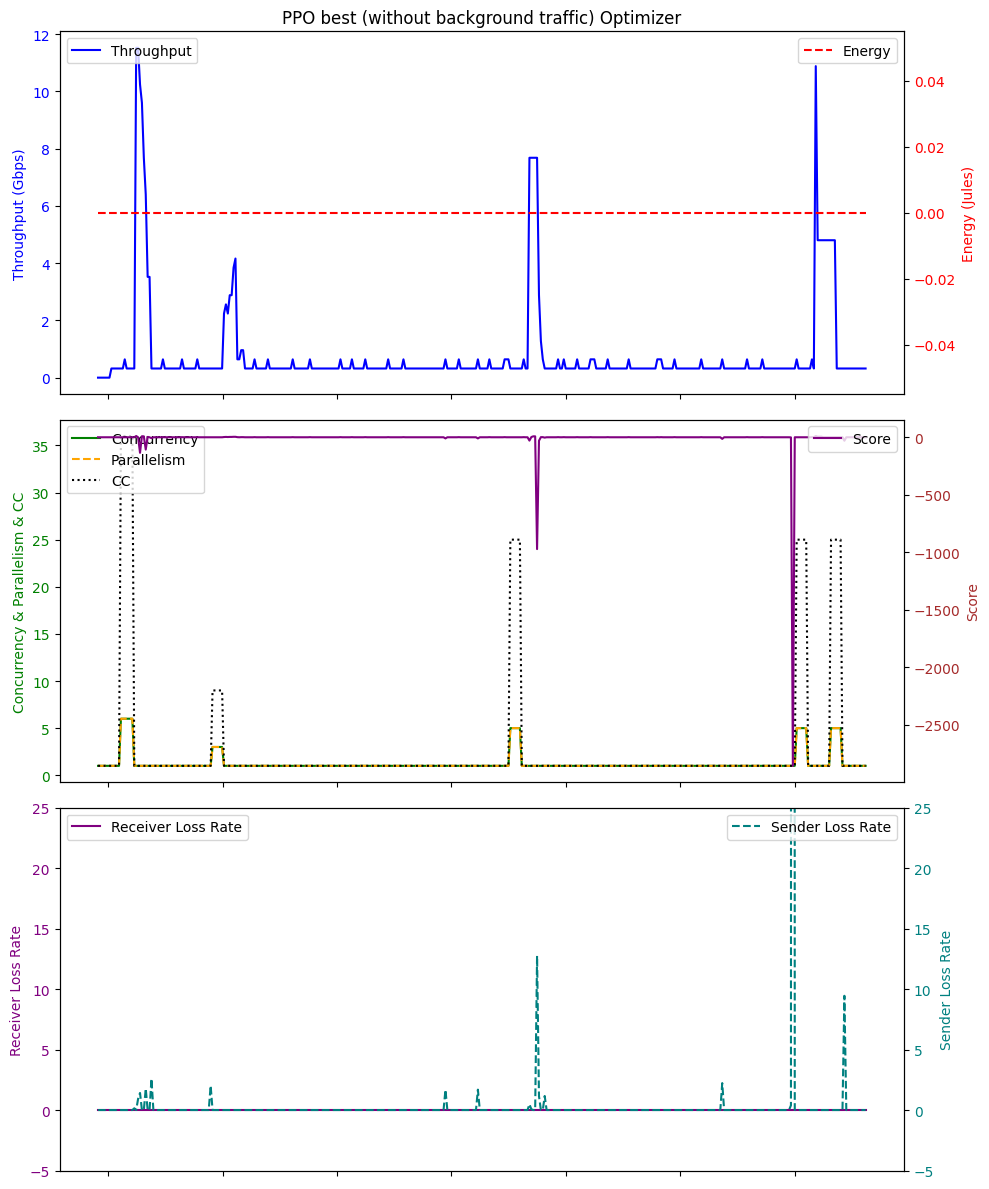

Average Throughput: 0.7868982630272953
Total Energy: 0.0
Total loss rate: 932.5643152461065
Reading from files in /home/cc/transferService/final_code_transferService/ppo_4m_scratch/logFileDir/


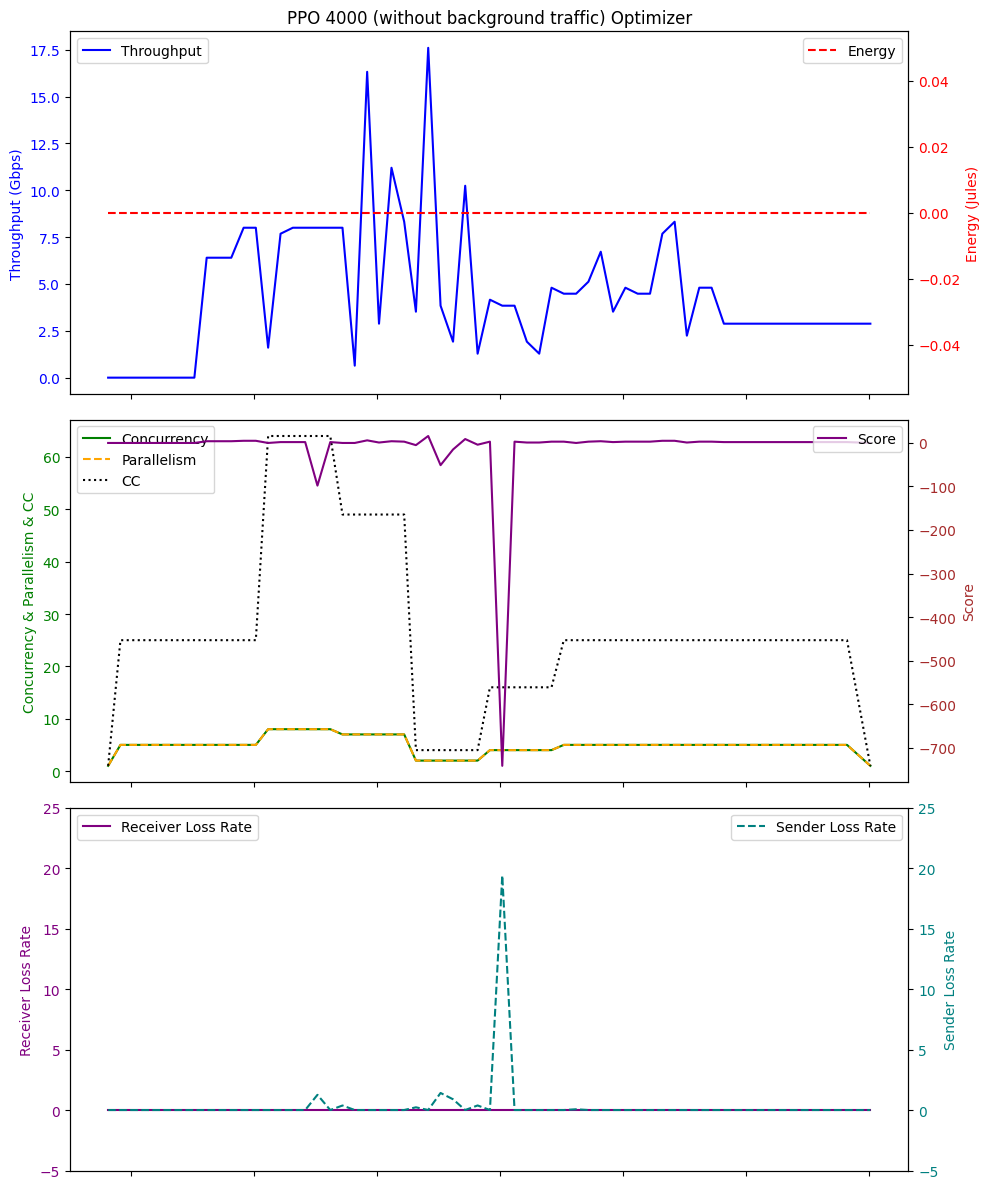

Average Throughput: 4.55741935483871
Total Energy: 0.0
Total loss rate: 23.995073626600018
Reading from files in /home/cc/transferService/final_code_transferService/ppo_4m_scratch/logFileDir/


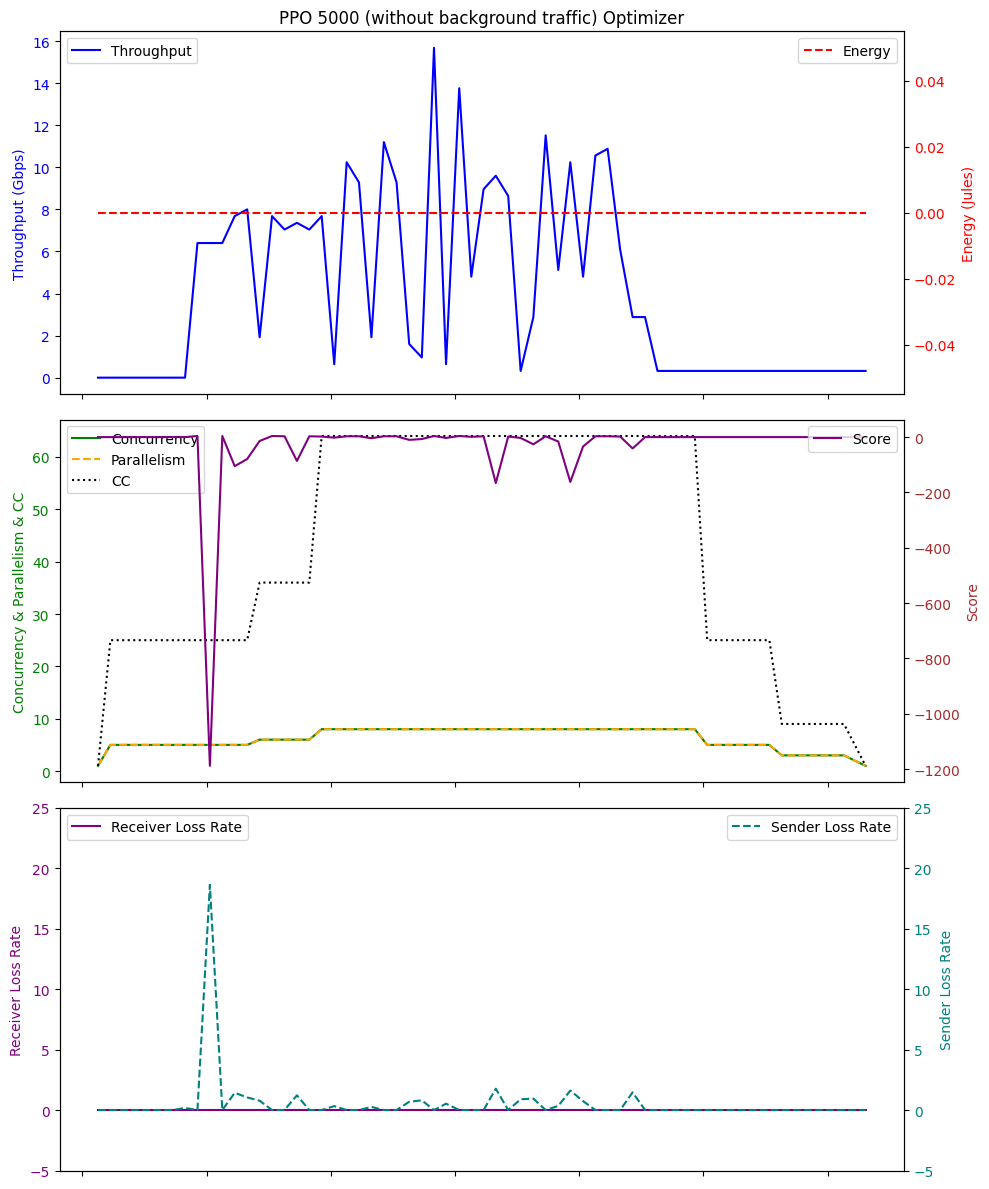

Average Throughput: 4.103225806451612
Total Energy: 0.0
Total loss rate: 33.58255653508342


In [18]:
model_list=['best','4000','5000']
throughput_list=[]
plr_list=[]
for model in model_list:
    directory = f'/home/cc/transferService/final_code_transferService/ppo_4m_scratch/logFileDir/'
    print(f'Reading from files in {directory}')
    dfs = process_log_files(directory,f"ppo_{model}_")
    df=dfs[0]
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f'PPO {model} (without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.plot(df['Time'], df['CC'], label='CC', color='black', linestyle=':')
    ax2.set_ylabel('Concurrency & Parallelism & CC', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    ax3_twin = ax2.twinx()
    ax3_twin.plot(df['Time'], df['Score'], label='Score', color='purple', linestyle='-')
    ax3_twin.set_ylabel('Score', color='brown')
    ax3_twin.tick_params(axis='y', labelcolor='brown')
    
    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['receiver_lr'], label='Receiver Loss Rate', color='purple', linestyle='-')
#     ax3.plot(df['Time'], df['Score'], label='Score', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['sender_lr'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')
    ax4_twin.set_ylim(-5,25)
    ax3.set_ylim(-5,25)

    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
    plt.show()
    average_throughput = df['Throughput'].mean()
    print("Average Throughput:", average_throughput)
    throughput_list.append(average_throughput)
    total_energy = df['Energy'].sum()
    print("Total Energy:", total_energy)
    total_plr = df['sender_lr'].sum()
    print("Total loss rate:", total_plr)
    plr_list.append(total_plr)


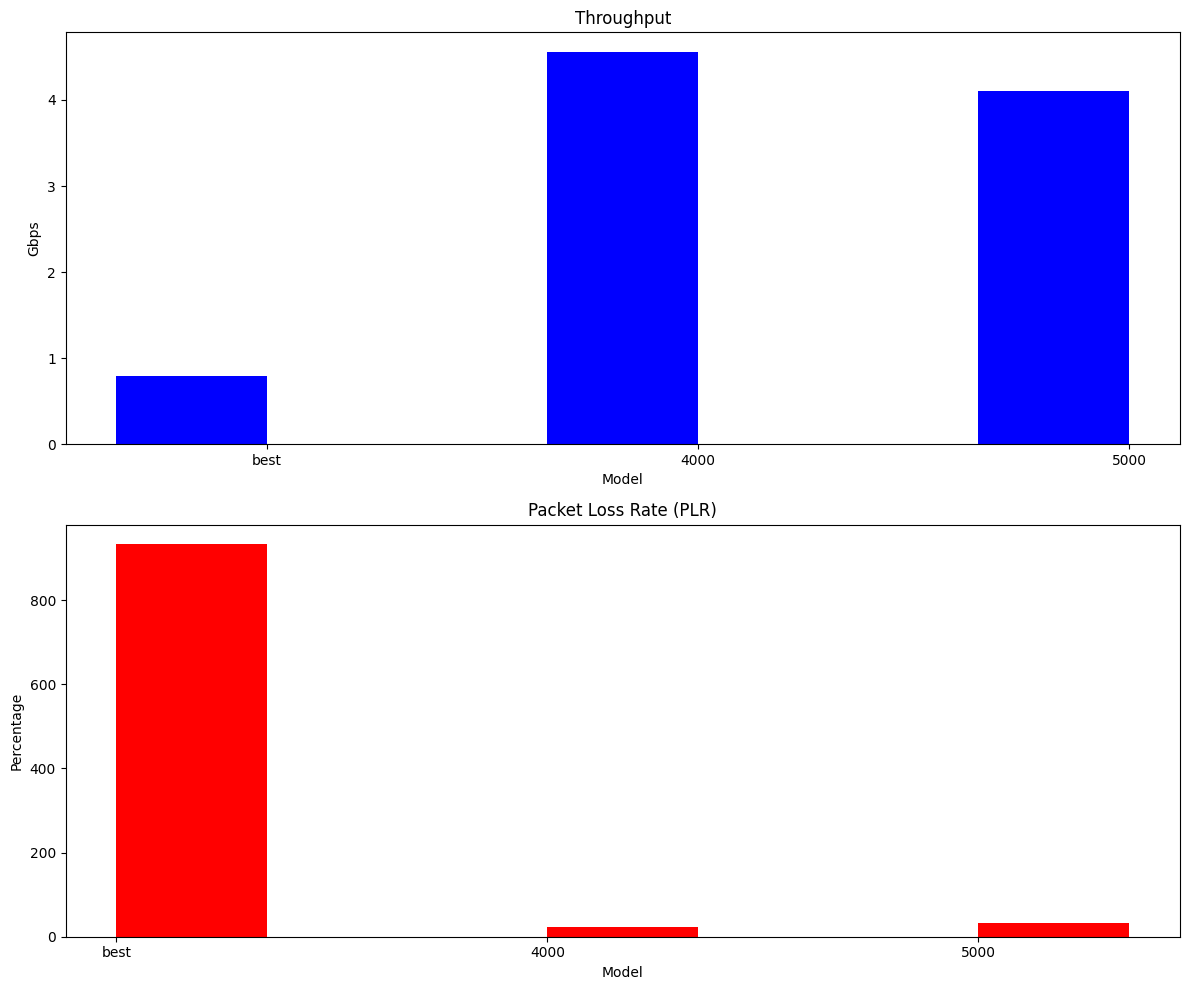

In [19]:
# Bar width
bar_width = 0.35
# X locations for the bars
ind = np.arange(len(model_list))

# Creating subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plotting Throughput
axes[0].bar(ind - bar_width/2, throughput_list, bar_width, color='blue', label='Throughput')
axes[0].set_title('Throughput')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Gbps')
axes[0].set_xticks(ind)
axes[0].set_xticklabels(model_list)

# Plotting Packet Loss Rate (PLR)
axes[1].bar(ind + bar_width/2, plr_list, bar_width, color='red', label='PLR')
axes[1].set_title('Packet Loss Rate (PLR)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Percentage')
axes[1].set_xticks(ind)
axes[1].set_xticklabels(model_list)

plt.tight_layout()
plt.show()
